In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
df = pd.read_stata("HCMST 2017 fresh sample for public sharing draft v1.1.dta")

### Wybór zmiennych

In [201]:
d = df.isna().sum()/df.shape[0]
np.set_printoptions(threshold=np.nan)
np.array(d[d<0.3].index)

array(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt',
       'weight1a', 'weight1a_freqwt', 'weight_combo',
       'weight_combo_freqwt', 'duration', 'speed_flag', 'consent', 'xlgb',
       'S1', 'DOV_Branch', 'Q4', 'Q6A', 'Q6B', 'Q9', 'Q10', 'Q11', 'Q12',
       'Q14', 'Q15A7', 'Q16', 'Q19', 'Q21A_Year', 'Q21A_Month',
       'Q21B_Year', 'Q21B_Month', 'Q21C_Year', 'Q21C_Month',
       'w6_identity', 'Q23', 'Q25', 'Q27', 'Q28', 'w6_friend_connect_1',
       'w6_friend_connect_2', 'w6_friend_connect_3',
       'w6_friend_connect_4', 'w6_friend_connect_Refused', 'Q32', 'Q34',
       'w6_sex_frequency', 'w6_otherdate', 'partyid7', 'PERSNET_hom',
       'ppc10017', 'ppc21310', 'ppp20071', 'ppp20072', 'ppage',
       'ppagecat', 'ppagect4', 'ppeduc', 'ppeducat', 'ppethm', 'ppgender',
       'pphhhead', 'pphhsize', 'pphouse', 'ppincimp', 'ppmarit',
       'ppmsacat', 'PPREG4', 'ppreg9', 'pprent', 'PPT01', 'PPT25',
       'PPT612', 'PPT1317', 'PPT18OV', 'ppwork', 'Race_1', 'Rac

In [202]:
df['y'] = 1 - df['S1'].cat.codes

1. Zmienne jakościowe  
a) `Q25` - Did you and [Partner name] attend the same high school?  
b) `ppmarit` -  Marital Status  

2. Zmienne ilościowe  
a) `ppincimp` - Household Income  
b) `Q16` - How many of your relatives do you see in person at least once a month?
 Include parents, brothers and sisters, uncles, aunts, cousins,
 grandparents, or others.   

In [203]:
columns = ['Q25', 'ppmarit', 'ppincimp', 'Q16', 'y']

In [204]:
df = df[columns].dropna()

In [205]:
X = df[columns[:4]].copy()
X.loc[:, columns[:3]] = X[columns[:3]].apply(lambda x: x.cat.codes, axis=0)
y = df['y']

In [206]:
X.shape

(2836, 4)

### Model

In [207]:
gbm = xgb.XGBClassifier(
     learning_rate =0.1,
     n_estimators=50,
     max_depth=8,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective='binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27).fit(X, y)

### Ceteris Paribus

In [208]:
def plot_feature(model, x_source, feature_number, feature_range, feature_categories=None):
    X = pd.DataFrame([x_source for t in feature_range] + [x_source])
    X.iloc[:len(feature_range), feature_number] = list(feature_range)
    
    y_pred = gbm.predict_proba(X)
    y_pred = [x[1] for x in y_pred]
    
    plt.plot(X.iloc[:-1,feature_number], y_pred[:-1])
    if feature_categories is not None:
        plt.xticks(X.iloc[:-1,feature_number], [feature_categories[int(t)] for t in X.iloc[:-1,feature_number]], rotation='vertical')
    
    plt.scatter(source[feature_number], y_pred[-1], s=40, c='black')
    plt.xlabel(X.columns[feature_number])
    plt.ylabel('Married probability')

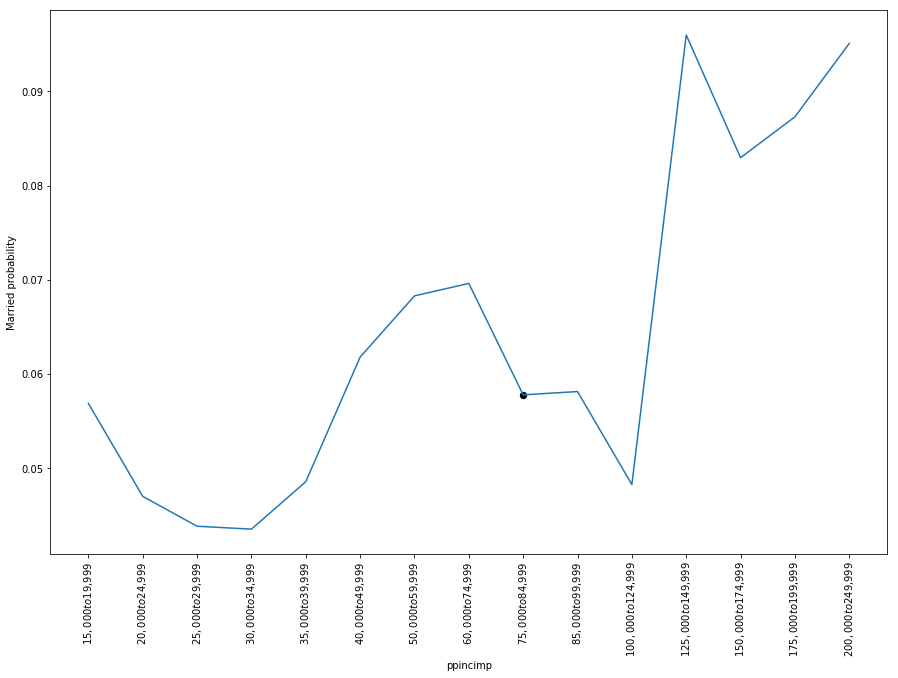

In [218]:
plt.figure(figsize=(15, 10))
plot_feature(gbm, X.iloc[18], 2, range(5,20), list(df['ppincimp'].cat.categories))

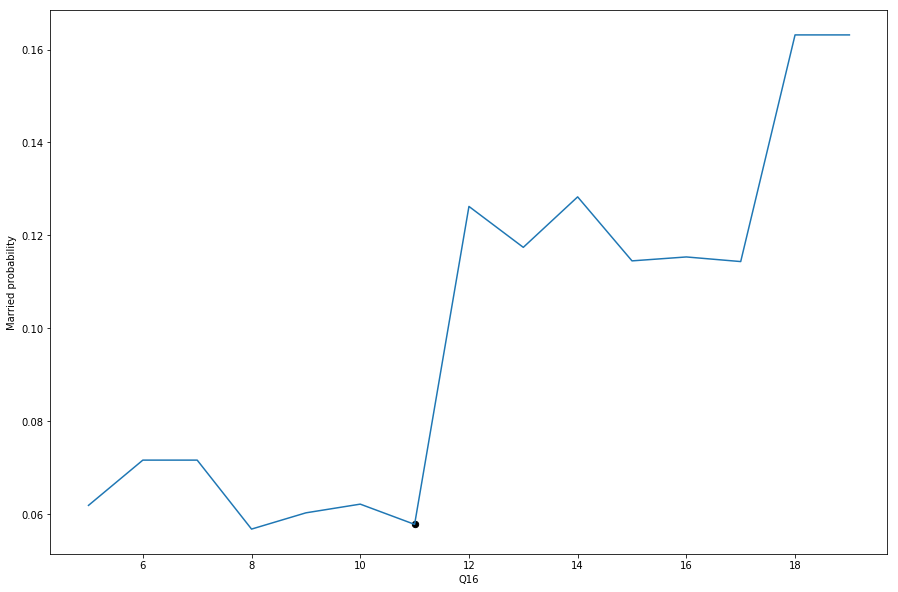

In [219]:
plt.figure(figsize=(15, 10))
plot_feature(gbm, X.iloc[18], 3, range(5,20))